#### Тема «Создание признакового пространства»
Продолжим обработку данных с Твиттера.
1. Создайте мешок слов с помощью
sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed'
и 'tweet_lemmatized' отдельно.

● Игнорируем слова, частота которых в документе строго превышает порог 0.9 с
помощью max_df.

● Ограничим количество слов, попадающий в мешок, с помощью max_features =
1000.

● Исключим стоп-слова с помощью stop_words='english'.

● Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с
помощью CountVectorizer.get_feature_names().

2. Создайте мешок слов с помощью

sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и
'tweet_lemmatized' отдельно.

● Игнорируем слова, частота которых в документе строго превышает порог 0.9 с
помощью max_df.

● Ограничим количество слов, попадающий в мешок, с помощью max_features =
1000.

● Исключим стоп-слова с помощью stop_words='english'.

● Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с
помощью TfidfVectorizer.get_feature_names().

3. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте
таблицу метод векторизации и скор который вы получили (в методах векторизации по
изменяйте параметры что бы добиться лучшего скора) обратите внимание как
падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же
попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на
качество сделайте выводы

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

import os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD

import warnings
warnings.filterwarnings("ignore")

In [2]:
combine_df = pd.read_pickle('./combine_df.pkl')
combine_df.head()

,id,label,tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thank, lyft, credit, use, cause, offer, wheel..."
2,3,0.0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"
3,4,0.0,model love you take with you all the time in ur,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time, ur]","[model, love, take, time, ur]","[model, love, take, time, ur]"
4,5,0.0,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]"


#### 1. Создайте мешок слов с помощью sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.

● Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.

● Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.

● Исключим стоп-слова с помощью stop_words='english'.

● Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью CountVectorizer.get_feature_names().

In [3]:
count_vectorizer_stemmed = CountVectorizer(max_df=0.9, 
                                           max_features = 1000, 
                                           stop_words='english', 
                                           binary=False)

bag_of_words_stemmed = count_vectorizer_stemmed.fit_transform(
    combine_df.tweet_stemmed.apply(lambda x: ' '.join([word for word in x]))
)

feature_names = count_vectorizer_stemmed.get_feature_names()

df_bag_of_words_stemmed = pd.DataFrame(bag_of_words_stemmed.toarray(), columns=feature_names)
df_bag_of_words_stemmed.head()

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_bag_of_words_stemmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Columns: 1000 entries, abl to yummi
dtypes: int64(1000)
memory usage: 375.1 MB


In [5]:
count_vectorizer_lemmatized = CountVectorizer(max_df=0.9, 
                                             max_features = 1000, 
                                              stop_words='english', 
                                              binary=False)

bag_of_words_lemmatized = count_vectorizer_lemmatized.fit_transform(
    combine_df.tweet_lemmatized.apply(lambda x: ' '.join([word for word in x]))
)

feature_names = count_vectorizer_lemmatized.get_feature_names()

df_bag_of_words_lemmatized = pd.DataFrame(bag_of_words_lemmatized.toarray(), columns=feature_names)
df_bag_of_words_lemmatized.head()

,able,absolutely,accept,account,act,action,actor,actually,adapt,add,...,yesterday,yo,yoga,york,young,youth,youtube,yr,yrs,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_bag_of_words_lemmatized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Columns: 1000 entries, able to yummy
dtypes: int64(1000)
memory usage: 375.1 MB


#### 2. Создайте мешок слов с помощью sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.

● Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.

● Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.

● Исключим стоп-слова с помощью stop_words='english'.

● Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью TfidfVectorizer.get_feature_names().

##### tweet_stemmed

In [7]:
tfidf_vectorizer_stemmed = TfidfVectorizer(max_df=0.9, 
                                           max_features = 1000, 
                                           stop_words='english')

values_stemmed = tfidf_vectorizer_stemmed.fit_transform(
    combine_df.tweet_stemmed.apply(lambda x: ' '.join([word for word in x]))
)

feature_names = tfidf_vectorizer_stemmed.get_feature_names()

df_tfidf_vectorizer_stemmed = pd.DataFrame(values_stemmed.toarray(), columns = feature_names)
df_tfidf_vectorizer_stemmed.head()

,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_tfidf_vectorizer_stemmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Columns: 1000 entries, abl to yummi
dtypes: float64(1000)
memory usage: 375.1 MB


##### tweet_lemmatized

In [9]:
tfidf_vectorizer_lemmatized = TfidfVectorizer(max_df=0.9, 
                                              max_features = 1000, 
                                              stop_words='english')

values_lemmatized = tfidf_vectorizer_lemmatized.fit_transform(
    combine_df.tweet_lemmatized.apply(lambda x: ' '.join([word for word in x]))
)

feature_names = tfidf_vectorizer_lemmatized.get_feature_names()

df_tfidf_vectorizer_lemmatized = pd.DataFrame(values_lemmatized.toarray(), columns = feature_names)
df_tfidf_vectorizer_lemmatized.head()

,able,absolutely,accept,account,act,action,actor,actually,adapt,add,...,yesterday,yo,yoga,york,young,youth,youtube,yr,yrs,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_tfidf_vectorizer_lemmatized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Columns: 1000 entries, able to yummy
dtypes: float64(1000)
memory usage: 375.1 MB


#### 3. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте таблицу метод векторизации и скор который вы получили (в методах векторизации по изменяйте параметры что бы добиться лучшего скора) обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на качество сделайте выводы.

In [11]:
corpus = open('./corpus').read()
labels, texts = [], []
for i, line in enumerate(corpus.split("\n")):
    content = line.split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# создаем df
trainDF = pd.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels

trainDF.head()

,text,label
0,Stuning even for the non-gamer: This sound tra...,__label__2
1,The best soundtrack ever to anything.: I'm rea...,__label__2
2,Amazing!: This soundtrack is my favorite music...,__label__2
3,Excellent Soundtrack: I truly like this soundt...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After He...",__label__2


In [12]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'],
                                                                      trainDF['label'])

encoder = preprocessing.LabelEncoder()

train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [13]:
count_vect_corp = CountVectorizer(analyzer='word', 
                                  token_pattern=r'\w{1,}')

tfidf_vec_corp = TfidfVectorizer(analyzer='word', 
                                 token_pattern=r'\w{1,}')

count_vect_corp_mod = CountVectorizer(max_df=0.9, 
                                      max_features = 1000, 
                                      stop_words='english', 
                                      analyzer='word', 
                                      token_pattern=r'\w{1,}')

tfidf_vec_corp_mod = TfidfVectorizer(max_df=0.9, 
                                     max_features = 1000, 
                                     stop_words='english', 
                                     analyzer='word', 
                                     token_pattern=r'\w{1,}')

In [14]:
count_vect_corp.fit(trainDF['text'])
tfidf_vec_corp.fit(trainDF['text'])
count_vect_corp_mod.fit(trainDF['text'])
tfidf_vec_corp_mod.fit(trainDF['text'])

TfidfVectorizer(max_df=0.9, max_features=1000, stop_words='english',
                token_pattern='\\w{1,}')

In [15]:
res = pd.DataFrame()

vectorizers = [count_vect_corp,
               tfidf_vec_corp, 
                       
               count_vect_corp_mod, 
               tfidf_vec_corp_mod, 
                       
               count_vectorizer_stemmed, 
               tfidf_vectorizer_stemmed, 
                       
               count_vectorizer_lemmatized, 
               tfidf_vectorizer_lemmatized]

for vectorizer in vectorizers:

    xtrain_count = vectorizer.transform(train_x)
    xvalid_count = vectorizer.transform(valid_x)

    classifier = linear_model.LogisticRegression()    
    classifier.fit(xtrain_count, train_y)
    
    predictions = classifier.predict(xvalid_count)
    
    res = res.append(
        pd.DataFrame([[str(vectorizer), accuracy_score(valid_y, predictions)]], columns=['Vectorizer', 'Score'])
    )

In [17]:
res.sort_values('Score', ascending=False, inplace=True)
res.head(8)

,Vectorizer,Score
0,"TfidfVectorizer(token_pattern='\\w{1,}')",0.8664
0,"CountVectorizer(token_pattern='\\w{1,}')",0.8564
0,"TfidfVectorizer(max_df=0.9, max_features=1000,...",0.8272
0,"CountVectorizer(max_df=0.9, max_features=1000,...",0.8076
0,"TfidfVectorizer(max_df=0.9, max_features=1000,...",0.7532
0,"CountVectorizer(max_df=0.9, max_features=1000,...",0.7436
0,"TfidfVectorizer(max_df=0.9, max_features=1000,...",0.7276
0,"CountVectorizer(max_df=0.9, max_features=1000,...",0.7160


##### Вывод: 
Наилучший результат показал TfidfVectorizer с использованием token_pattern (0.8664). С уменьшением фичей результат ухудшается.

####  Применим PCA к векторайзерам.

In [18]:
values = tfidf_vec_corp.fit_transform(trainDF['text'])
values.shape

(10000, 31681)

In [20]:
# Что-то тормозит, посмотрим как выполняется. Не зависло ли?
from tqdm import tqdm

In [21]:
res = pd.DataFrame()

for n_components in tqdm ([100, 300, 500, 1000, 3000, 5000]):
    svd = TruncatedSVD(n_components=n_components)
    
    xtrain_count =  count_vect_corp.transform(train_x)
    xvalid_count =  count_vect_corp.transform(valid_x)

    xtrain_count_pca =  svd.fit_transform(xtrain_count)
    xvalid_count_pca =  svd.transform(xvalid_count)

    classifier = linear_model.LogisticRegression()
    classifier.fit(xtrain_count_pca, train_y)
    
    predictions = classifier.predict(xvalid_count_pca)
    
    res = res.append(
        pd.DataFrame([[str(n_components), accuracy_score(valid_y, predictions)]], columns=['# Components', 'Score'])
    )

100%|█████████████████████████████████████████████████████████████████████████████████| 6/6 [1:25:35<00:00, 855.87s/it]


In [42]:
res.sort_values('Score', ascending=True, inplace=True)
res.head(6)

,# Components,Score
0,100,0.7728
0,300,0.8356
0,500,0.8436
0,5000,0.8516
0,1000,0.8520
0,3000,0.8532


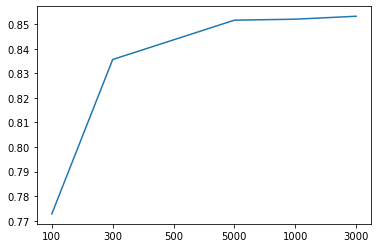

In [43]:
plt.plot(res['# Components'], res['Score']);

#### Выводы:
1. При сокращении размерности PCA качество модели уменьшается. Хотя есть исключения, например при увеличении фичей до 5000 точность предсказаний уменьшилась по сравнению с 3000.
2. Увеличение признаков резко приводит к замедлению скорости работы модели. Так при значении n_components = 100, модель отработала примерно за 30 сек, при 5000 за 1:25:35.
3. Принимая во внимания пп 1 и 2, можно сделать вывод что существует некое оптимальное количество признаков для каждой модели и оно не всегда является максимальным.